In [1]:
import pandas as pd
import numpy as np

In [2]:
## part a:

In [3]:
fl = pd.read_csv("Desktop/Flower.csv")

In [4]:
df = pd.DataFrame(fl);
df

,X1,X2,Class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0
...,...,...,...
395,0.450368,2.408121,1
396,0.037573,0.891601,1
397,0.213641,1.732016,1
398,0.324387,-2.116325,1


In [5]:
## part b:

In [6]:
## checking missing values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   Class   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [8]:
## normalizing integer values:

In [9]:
from sklearn import preprocessing

In [10]:
df_scaleN = preprocessing.normalize(df[['X1', 'X2']])
df_scaleN = pd.DataFrame(df_scaleN);
df_scaleN['Class'] = df['Class']
df_scaleN.columns = ['X1', 'X2', 'Class']
df_ready = df_scaleN
df_ready

,X1,X2,Class
0,0.319185,0.947693,0
1,0.106471,-0.994316,0
2,0.074209,-0.997243,0
3,0.166776,-0.985995,0
4,0.233616,0.972329,0
...,...,...,...
395,0.183833,0.982957,1
396,0.042103,0.999113,1
397,0.122420,0.992478,1
398,0.151509,-0.988456,1


In [11]:
## part c:

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

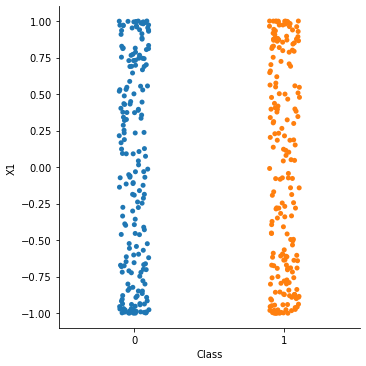

In [13]:
sns.catplot(x="Class", y="X1", data=df_scaleN)

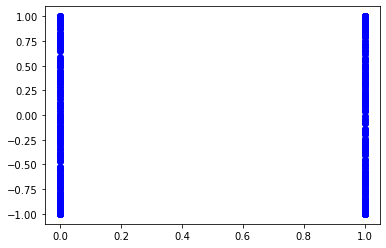

In [39]:
plt.scatter(df_ready.Class, df_ready.X1, c ="blue")
plt.show()

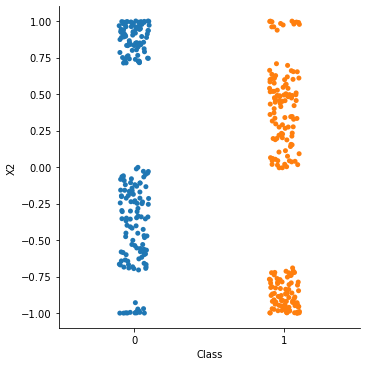

In [14]:
sns.catplot(x="Class", y="X2", data=df_scaleN)

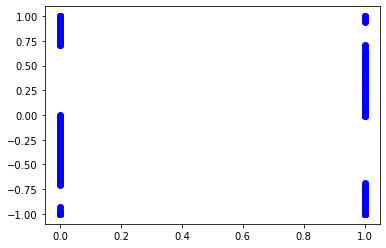

In [37]:
plt.scatter(df_ready.Class, df_ready.X2, c ="blue")
plt.show()

In [15]:
## part d:

In [16]:
y = df_ready['Class']

In [18]:
x = df_ready.drop(['Class'], axis=1)

In [19]:
## part e:

In [20]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
y_train.value_counts()

1    162
0    158
Name: Class, dtype: int64

In [27]:
y_test.value_counts()

0    42
1    38
Name: Class, dtype: int64

In [28]:
## part f:

In [29]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

C:\Users\Marzieh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [30]:
## part g:

In [31]:
predictions = mlp.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[33  9]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        42
           1       0.80      0.95      0.87        38

    accuracy                           0.86        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.88      0.86      0.86        80



In [33]:
## part h:

In [56]:
def plot_prediction(model, X, y):
    x_min, x_max = X.T.iloc[0, :].min() - 1, X.T.iloc[0, :].max() + 1
    y_min, y_max = X.T.iloc[1, :].min() - 1, X.T.iloc[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('X1')
    plt.xlabel('X2')
    plt.scatter(X.T.iloc[0, :], X.T.iloc[1, :], c=y.iloc[:], cmap=plt.cm.Spectral)

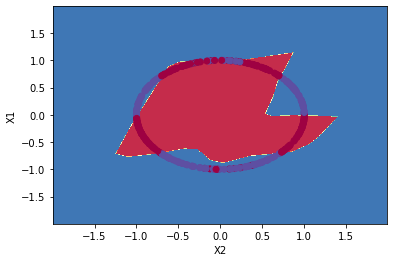

In [58]:
plot_prediction(lambda x: mlp.predict(x), X_train, y_train)

In [59]:
## part i:

In [129]:
mlp1 = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlp1.fit(X_train, y_train)
predictions1 = mlp1.predict(X_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[30 12]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        42
           1       0.75      0.95      0.84        38

    accuracy                           0.82        80
   macro avg       0.84      0.83      0.82        80
weighted avg       0.85      0.82      0.82        80



In [130]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=1000)
mlp2.fit(X_train, y_train)
predictions2 = mlp2.predict(X_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[33  9]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        42
           1       0.80      0.95      0.87        38

    accuracy                           0.86        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.88      0.86      0.86        80



In [131]:
mlp3 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)
mlp3.fit(X_train, y_train)
predictions3 = mlp3.predict(X_test)
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[34  8]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.81      0.92      0.86        38

    accuracy                           0.86        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



In [132]:
mlp4 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2500)
mlp4.fit(X_train, y_train)
predictions4 = mlp4.predict(X_test)
print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))

[[35  7]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.83      0.92      0.88        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.88      0.88      0.88        80



In [133]:
mlp5 = MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000)
mlp5.fit(X_train, y_train)
predictions5 = mlp5.predict(X_test)
print(confusion_matrix(y_test,predictions5))
print(classification_report(y_test,predictions5))

[[31 11]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        42
           1       0.76      0.89      0.82        38

    accuracy                           0.81        80
   macro avg       0.82      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



C:\Users\Marzieh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [134]:
mlp6 = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), max_iter=1000)
mlp6.fit(X_train, y_train)
predictions6 = mlp6.predict(X_test)
print(confusion_matrix(y_test,predictions6))
print(classification_report(y_test,predictions6))

[[35  7]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.83      0.92      0.88        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.88      0.88      0.88        80



C:\Users\Marzieh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [135]:
mlp7 = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), max_iter=2000, activation='tanh')
mlp7.fit(X_train, y_train)
predictions7 = mlp7.predict(X_test)
print(confusion_matrix(y_test,predictions7))
print(classification_report(y_test,predictions7))

[[35  7]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.83      0.92      0.88        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.88      0.88      0.88        80



In [136]:
mlp8 = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8, 8), max_iter=2000, activation='identity')
mlp8.fit(X_train, y_train)
predictions8 = mlp8.predict(X_test)
print(confusion_matrix(y_test,predictions8))
print(classification_report(y_test,predictions8))

[[21 21]
 [19 19]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        42
           1       0.47      0.50      0.49        38

    accuracy                           0.50        80
   macro avg       0.50      0.50      0.50        80
weighted avg       0.50      0.50      0.50        80



In [137]:
mlp9 = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), max_iter=2000, activation='logistic')
mlp9.fit(X_train, y_train)
predictions9 = mlp9.predict(X_test)
print(confusion_matrix(y_test,predictions9))
print(classification_report(y_test,predictions9))

[[ 0 42]
 [ 0 38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.47      1.00      0.64        38

    accuracy                           0.48        80
   macro avg       0.24      0.50      0.32        80
weighted avg       0.23      0.47      0.31        80



C:\Users\Marzieh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marzieh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marzieh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
## the best:

In [140]:
mlp10 = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), max_iter=1300)
mlp10.fit(X_train, y_train)
predictions10 = mlp10.predict(X_test)
print(confusion_matrix(y_test,predictions10))
print(classification_report(y_test,predictions10))

[[36  6]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        42
           1       0.85      0.92      0.89        38

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



In [ ]:
## default:

In [146]:
mlp11 = MLPClassifier()
mlp11.fit(X_train, y_train)
predictions11 = mlp11.predict(X_test)
print(confusion_matrix(y_test,predictions11))
print(classification_report(y_test,predictions11))

[[31 11]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.78        42
           1       0.74      0.84      0.79        38

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



C:\Users\Marzieh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [147]:
## another way: (search)

In [157]:
mlp12 = MLPClassifier(max_iter=1000)

In [171]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu']
}

In [172]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp12, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)]})

In [173]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50)}
0.544 (+/-0.109) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50)}
0.541 (+/-0.124) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 100, 50)}
0.522 (+/-0.100) for {'activation': 'tanh', 'hidden_layer_sizes': (100,)}
0.903 (+/-0.008) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50)}
0.891 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50)}
0.844 (+/-0.071) for {'activation': 'relu', 'hidden_layer_sizes': (100,)}


In [174]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        42
           1       0.80      0.92      0.85        38

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.86      0.85      0.85        80



In [175]:
##with bigger iteration:

In [176]:
mlp13 = MLPClassifier(max_iter=2000)

In [177]:
clf2 = GridSearchCV(mlp13, parameter_space, n_jobs=-1, cv=3)
clf2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)]})

In [178]:
# Best paramete set
print('Best parameters found:\n', clf2.best_params_)

# All results
means2 = clf2.cv_results_['mean_test_score']
stds2 = clf2.cv_results_['std_test_score']
for mean2, std2, params2 in zip(means2, stds2, clf2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean2, std2 * 2, params2))

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50)}
0.678 (+/-0.312) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50)}
0.569 (+/-0.130) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 100, 50)}
0.491 (+/-0.028) for {'activation': 'tanh', 'hidden_layer_sizes': (100,)}
0.891 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50)}
0.903 (+/-0.023) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50)}
0.878 (+/-0.027) for {'activation': 'relu', 'hidden_layer_sizes': (100,)}


In [179]:
y_true2, y_pred2 = y_test , clf2.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true2, y_pred2))

Results on the test set:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.78      0.95      0.86        38

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.87      0.85      0.85        80

